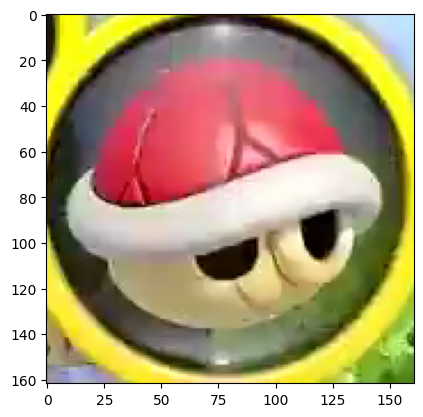

In [1]:
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('/Users/shingkai/code/personal-projects/mk8/race_videos/training/mirror_flower_cup/p1_first_item/0/001825.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [3]:
from enum import Enum

class Item(int, Enum):
    BANANA = 1
    TRIPLE_BANANA = 2
    GREEN_SHELL = 3
    TRIPLE_GREEN_SHELL = 4
    RED_SHELL = 5
    TRIPLE_RED_SHELL = 6
    BLUE_SHELL = 7
    BOB_OMB = 8
    MUSHROOM = 9
    TRIPLE_MUSHROOM = 10
    GOLDEN_MUSHROOM = 11
    BULLET_BILL = 12
    BLOOPER = 13
    LIGHTNING = 14
    STAR = 15
    FIRE_FLOWER = 16
    BOOMERANG = 17
    PIRANHA_PLANT = 18
    SUPER_HORN = 19
    CRAZY_EIGHT = 20
    COIN = 21
    FEATHER = 22
    BOO = 23
    NONE = 24

In [ ]:
GREEN_SHELL : {[(3510,4002)]}
RED_SHELL : {[(1825,1955)]}
COIN : {[(2693,2860),(3443,3483)]}


In [8]:
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def load_images(folder_path):
    images = []
    file_paths = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(folder_path, filename)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize((100, 100))  # Resize for consistency
                images.append(img)
                file_paths.append(file_path)
            except Exception as e:
                print(f"Error processing {filename}: {str(e)}")
    return images, file_paths

def extract_features(images):
    features = []
    for img in images:
        hist = img.histogram()
        features.append(hist)
    return np.array(features)

def cluster_images(folder_path, n_clusters):
    # Load images
    print("Loading images...")
    images, file_paths = load_images(folder_path)
    
    # Extract features
    print("Extracting features...")
    features = extract_features(images)
    
    # Normalize features
    scaler = StandardScaler()
    normalized_features = scaler.fit_transform(features)
    
    # Perform K-means clustering
    print("Clustering images...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_features)
    
    # Organize images into clusters
    clusters = {i: [] for i in range(n_clusters)}
    for file_path, label in zip(file_paths, cluster_labels):
        clusters[label].append(file_path)
    
    # Print results
    for cluster, files in clusters.items():
        print(f"Cluster {cluster}: {len(files)} images")
        # Optionally, you can print file names or move files to cluster-specific folders here
    
    return clusters
    


In [54]:
folder_path = "/Users/shingkai/code/personal-projects/mk8/race_videos/training/mirror_flower_cup/p1_first_item/0/"
n_clusters = 50
clustered_images = cluster_images(folder_path, n_clusters)

Loading images...
Extracting features...
Clustering images...
Cluster 0: 2389 images
Cluster 1: 882 images
Cluster 2: 1196 images
Cluster 3: 2215 images
Cluster 4: 3245 images
Cluster 5: 1876 images
Cluster 6: 190 images
Cluster 7: 362 images
Cluster 8: 2089 images
Cluster 9: 1227 images
Cluster 10: 323 images
Cluster 11: 556 images
Cluster 12: 391 images
Cluster 13: 352 images
Cluster 14: 1756 images
Cluster 15: 259 images
Cluster 16: 477 images
Cluster 17: 393 images
Cluster 18: 4744 images
Cluster 19: 302 images
Cluster 20: 620 images
Cluster 21: 193 images
Cluster 22: 1053 images
Cluster 23: 147 images
Cluster 24: 400 images
Cluster 25: 262 images
Cluster 26: 82 images
Cluster 27: 291 images
Cluster 28: 235 images
Cluster 29: 618 images
Cluster 30: 194 images
Cluster 31: 407 images
Cluster 32: 232 images
Cluster 33: 90 images
Cluster 34: 427 images
Cluster 35: 389 images
Cluster 36: 119 images
Cluster 37: 334 images
Cluster 38: 40 images
Cluster 39: 77 images
Cluster 40: 556 images

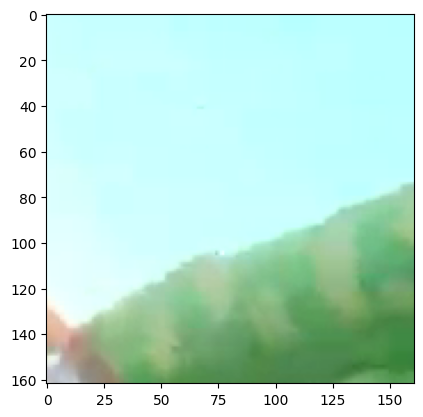

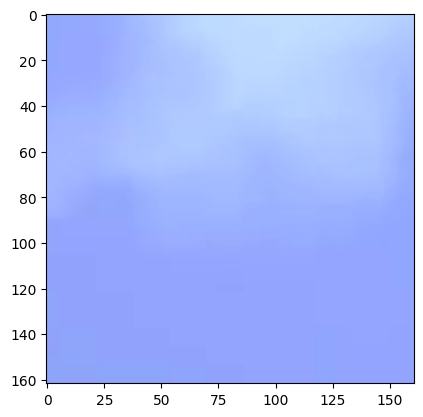

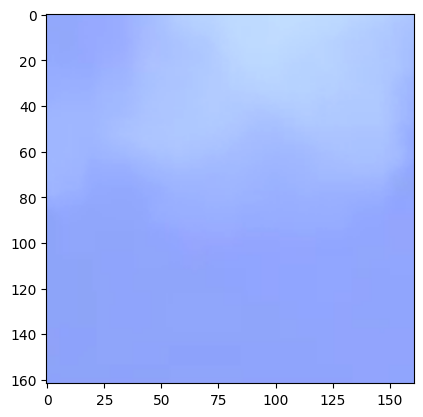

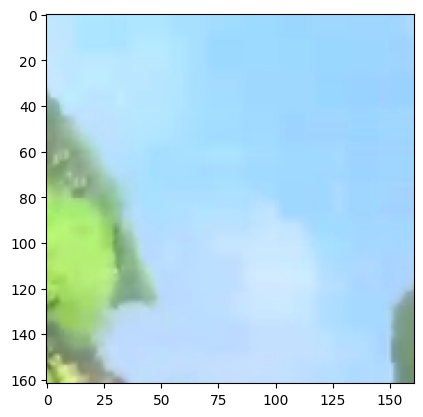

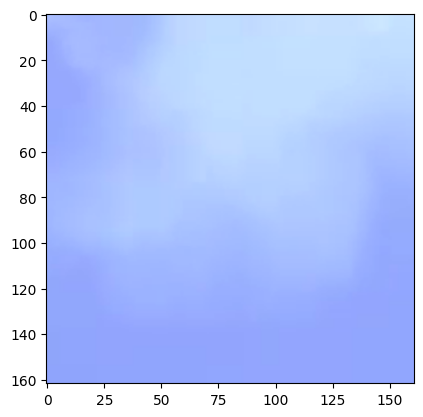

In [57]:
for image in clustered_images[2][:5]:
    plt.figure()
    plt.imshow(cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB))
    plt.show()

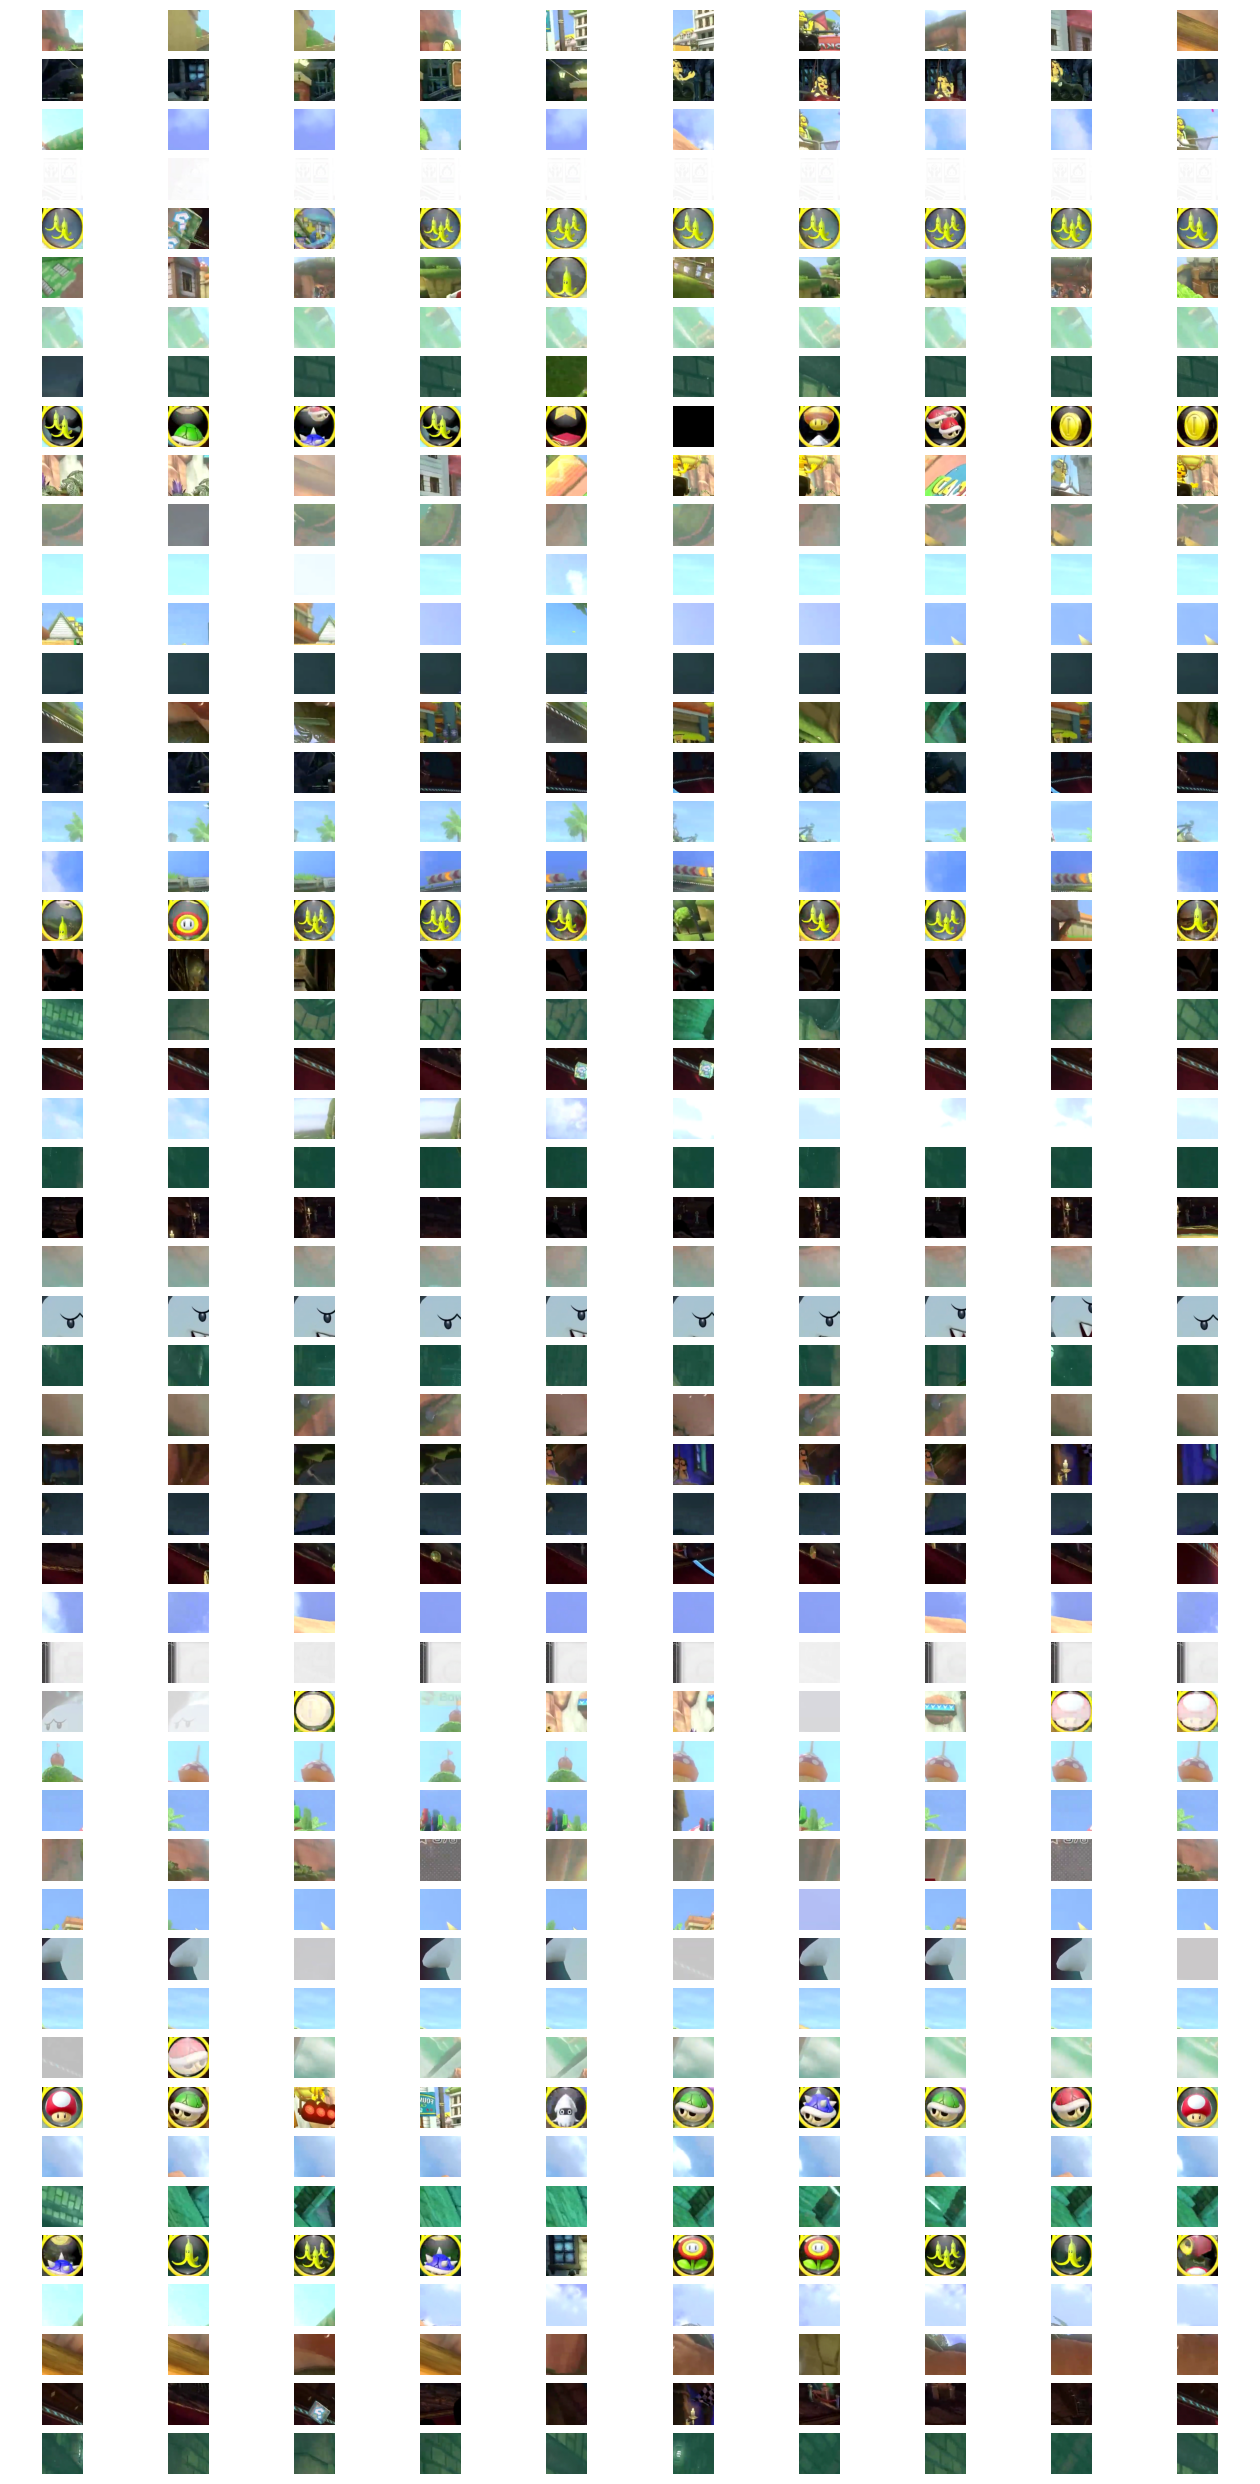

In [69]:
plt.subplots(figsize=(16, 64))
plt.axis('off')

for i in range(50):
    for j in range(10):
        plt.subplot(50,10,i*10+j+1)
        plt.axis('off')
        plt.imshow(cv2.cvtColor(cv2.imread(clustered_images[i][j]), cv2.COLOR_BGR2RGB))

plt.show()

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, random_split
import time
import copy

# # Check if GPU is available (either cuda for nvidia or mps for apple silicon)
device = torch.device("cuda:0" if torch.cuda.is_available() else torch.device("mps") if torch.backends.mps.is_available() else  torch.device("cpu"))


# Define transformations for the dataset (same for train and validation initially)
data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Set the directory path where the dataset is stored (single directory with subdirectories for each class)
data_dir = '/Users/shingkai/code/personal-projects/mk8/training_data/items'
# data_dir = '/home/itsgrimetime/code/MarioKart8CV/items'

# Load the dataset from the directory
full_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

# Split the dataset into train and validation sets (e.g., 80% train, 20% validation)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Create dataloaders for train and validation sets
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Dictionary to hold the dataloaders
dataloaders = {
    'train': train_loader,
    'val': val_loader
}

# Sizes of the datasets
dataset_sizes = {
    'train': len(train_dataset),
    'val': len(val_dataset)
}

# Class names (same as subdirectory names)
class_names = full_dataset.classes
print(f"class names: {class_names}")

# Load the pretrained VGG16 model
model = models.vgg16(pretrained=True)

# Freeze all layers in the network except the final classifier layer
for param in model.parameters():
    param.requires_grad = False

# Modify the classifier to fit our dataset (assuming the number of classes is determined by the dataset)
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_features, len(class_names))

# Move the model to the appropriate device
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.classifier.parameters(), lr=0.001, momentum=0.9)

# Learning rate scheduler to decrease learning rate by a factor of 0.1 every 7 epochs
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Train the model
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward pass + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Track loss and accuracy
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            # Adjust learning rate
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.float() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Deep copy the model if it has improved
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    # Load the best model weights
    model.load_state_dict(best_model_wts)
    return model



class names: ['1', '16', '21', '3', '5', '9', 'None']


/Users/shingkai/code/personal-projects/mk8/MarioKart8CV/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/shingkai/code/personal-projects/mk8/MarioKart8CV/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
# Train the model
num_epochs = 25
best_model = train_model(model, criterion, optimizer, scheduler, num_epochs)

# Save the trained model
torch.save(best_model.state_dict(), 'best_model_vgg16.pth')

Epoch 0/24
----------
train Loss: 0.2665 Acc: 0.9186
val Loss: 0.0995 Acc: 0.9831

Epoch 1/24
----------
train Loss: 0.0804 Acc: 0.9792
val Loss: 0.0684 Acc: 0.9882

Epoch 2/24
----------


KeyboardInterrupt: 

In [21]:
# class_names = ['1','3','5','9','16','21','None']

class_names = ['1', '16', '21', '3', '5', '9', 'None']

In [28]:
import torch
from torchvision import models, transforms
from PIL import Image
import numpy as np

# # Check if GPU is available (either cuda for nvidia or mps for apple silicon)
device = torch.device("cuda:0" if torch.cuda.is_available() else torch.device("mps") if torch.backends.mps.is_available() else  torch.device("cpu"))


# Load the model architecture
model = models.vgg16(pretrained=False)
num_features = model.classifier[6].in_features

# Modify the classifier to fit the number of classes in your model
model.classifier[6] = torch.nn.Linear(num_features, len(class_names))  # class_names should have the number of classes in your dataset

# Load the saved weights

model.load_state_dict(torch.load('/Users/shingkai/code/personal-projects/mk8/models/item_classifier_vgg16.pth', map_location=device))
# model.load_state_dict(torch.load('/home/itsgrimetime/code/MarioKart8CV/notebooks/best_model_vgg16.pth', map_location=device))



# Set the model to evaluation mode
model.eval()

# Move the model to the appropriate device (MPS or CPU)
model = model.to(device)

# Define the transformation to be applied to the input image (same as used during training)
preprocess = transforms.Compose([
    transforms.ToPILImage(),  # Convert numpy array (cv2) to PIL image
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

def predict_image(frame):
    
    # Preprocess the image
    img = preprocess(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    # Add batch dimension (PyTorch models expect a batch of images)
    img = img.unsqueeze(0)
    
    # Move the image to the same device as the model (MPS or CPU)
    img = img.to(device)
    
    # Turn off gradients for inference (faster and reduces memory usage)
    with torch.no_grad():
        outputs = model(img)
    
    # Get the predicted class (with the highest score)
    _, predicted_class = torch.max(outputs, 1)
    
    # Map the predicted class index to the class name
    predicted_class_name = class_names[predicted_class.item()]
    
    return predicted_class_name



/var/folders/cy/wrwx02w17cqc2zds1xjg55jc0000gn/T/ipykernel_75000/184776108.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/Users/shin

The predicted label for the image is: 3


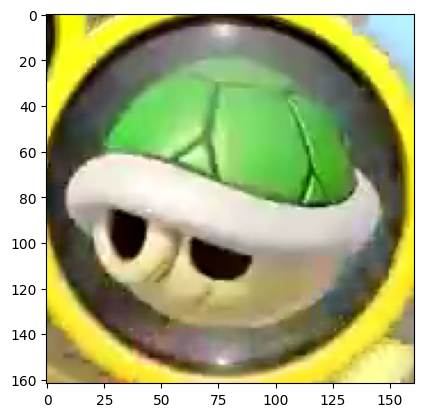

In [29]:
import matplotlib.pyplot as plt
import cv2

# Example of running inference
image_path = '/Users/shingkai/code/personal-projects/mk8/race_videos/training/mirror_flower_cup/p1_first_item/0/020094.png'
# image_path = '/home/itsgrimetime/code/MarioKart8CV/race_videoss/training/item1/Player.P1/000922.png'

frame = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
predicted_label = predict_image(frame)
print(f'The predicted label for the image is: {predicted_label}')

The predicted label for the image is: 5


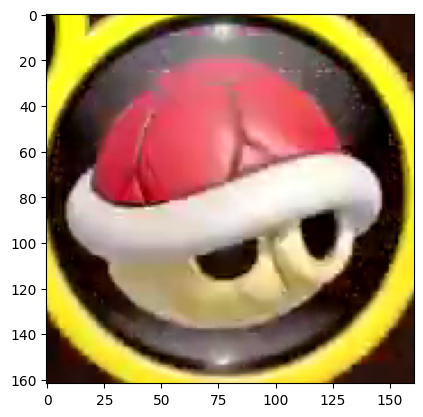

In [30]:
image_path = '/Users/shingkai/code/personal-projects/mk8/race_videos/training/mirror_flower_cup/p1_first_item/0/026030.png'
frame = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
predicted_label = predict_image(frame)
print(f'The predicted label for the image is: {predicted_label}')

The predicted label for the image is: 21


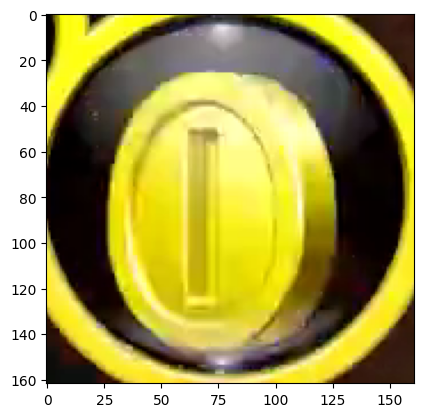

In [31]:
image_path = '/Users/shingkai/code/personal-projects/mk8/race_videos/training/mirror_flower_cup/p1_first_item/0/025855.png'
frame = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
predicted_label = predict_image(frame)
print(f'The predicted label for the image is: {predicted_label}')

The predicted label for the image is: None


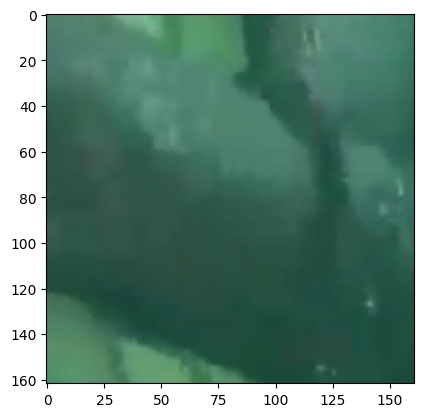

In [32]:
image_path = '/Users/shingkai/code/personal-projects/mk8/race_videos/training/mirror_flower_cup/p1_first_item/0/029638.png'
frame = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
predicted_label = predict_image(frame)
print(f'The predicted label for the image is: {predicted_label}')

# ResNeXt-50 Model

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, random_split
import os

# Check if MPS (Apple Silicon) or CUDA is available
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set hyperparameters
num_classes = 7  # Change this to the number of classes in your dataset
batch_size = 32
num_epochs = 10
learning_rate = 0.001
val_split = 0.2  # 20% of the data will be used for validation

# Define the data transforms for training and validation
data_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the dataset using ImageFolder
data_dir = '/Users/shingkai/code/personal-projects/mk8/training_data/items'  # Update this to your dataset path
dataset = datasets.ImageFolder(data_dir, transform=data_transforms)

# Calculate the sizes for training and validation
num_val_samples = int(val_split * len(dataset))
num_train_samples = len(dataset) - num_val_samples

# Create training and validation datasets
train_dataset, val_dataset = random_split(dataset, [num_train_samples, num_val_samples])

# Create the data loaders
dataloaders = {
    'train': DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4),
    'val': DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
}

# Get the number of classes
class_names = dataset.classes
print(f"class names: {class_names}")
num_classes = len(class_names)

# Load the ResNeXt-50 model, pretrained on ImageNet
# model = models.resnext50_32x4d(pretrained=True)
model = models.resnet18(pretrained=True)

# Modify the final fully connected layer to match the number of classes in your dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move the model to the device (MPS, CUDA, or CPU)
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Function to train the model
def train_model(model, criterion, optimizer, num_epochs=10):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward pass and optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Calculate the loss and accuracy
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.float() / len(dataloaders[phase].dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Deep copy the model if it has better accuracy
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

    print(f'Best val Acc: {best_acc:.4f}')

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model



class names: ['01', '02', '03', '04', '05', '07', '09', '10', '11', '12', '13', '15', '16', '18', '19', '21', '23', '24']


/Users/shingkai/code/personal-projects/mk8/MarioKart8CV/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/shingkai/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100.0%


In [18]:
# Train the model
best_model = train_model(model, criterion, optimizer, num_epochs)

# Save the best model weights
torch.save(best_model.state_dict(), 'item_classifier_resnet18.pth')

Epoch 0/9
----------
train Loss: 0.2880 Acc: 0.9172
val Loss: 0.1554 Acc: 0.9501
Epoch 1/9
----------
train Loss: 0.1556 Acc: 0.9543
val Loss: 0.1716 Acc: 0.9447
Epoch 2/9
----------
train Loss: 0.1122 Acc: 0.9654
val Loss: 0.0749 Acc: 0.9769
Epoch 3/9
----------
train Loss: 0.0968 Acc: 0.9718
val Loss: 0.0982 Acc: 0.9705
Epoch 4/9
----------
train Loss: 0.0798 Acc: 0.9774
val Loss: 0.0625 Acc: 0.9786
Epoch 5/9
----------
train Loss: 0.0809 Acc: 0.9765
val Loss: 0.0720 Acc: 0.9739
Epoch 6/9
----------
train Loss: 0.0773 Acc: 0.9765
val Loss: 0.0648 Acc: 0.9776
Epoch 7/9
----------
train Loss: 0.0604 Acc: 0.9814
val Loss: 0.0392 Acc: 0.9871
Epoch 8/9
----------
train Loss: 0.0453 Acc: 0.9858
val Loss: 0.0348 Acc: 0.9871
Epoch 9/9
----------
train Loss: 0.0534 Acc: 0.9830
val Loss: 0.0445 Acc: 0.9854
Best val Acc: 0.9871


In [15]:
import torch
from torchvision import models, transforms
from PIL import Image
import numpy as np

classes = ['01', '02', '03', '04', '05', '07', '09', '10', '11', '12', '13', '15', '16', '18', '19', '21', '23', '24']

# # Check if GPU is available (either cuda for nvidia or mps for apple silicon)
device = torch.device("cuda:0" if torch.cuda.is_available() else torch.device("mps") if torch.backends.mps.is_available() else  torch.device("cpu"))


# Load the model architecture
# model = models.resnext50_32x4d(pretrained=False)
model = models.resnet18(pretrained=True)
 # Adjust final layer to match output classes
model.fc = torch.nn.Linear(model.fc.in_features, len(class_names)) 
# Load the saved weights
model.load_state_dict(torch.load('/Users/shingkai/code/personal-projects/mk8/models/item_classifier_resnet18.pth', map_location=device))
# model.load_state_dict(torch.load('/home/itsgrimetime/code/MarioKart8CV/notebooks/item_classifier_resnet18.pth', map_location=device))

# Set the model to evaluation mode
model.eval()

# Move the model to the appropriate device (MPS or CPU)
model = model.to(device)

# Define the transformation to be applied to the input image (same as used during training)
preprocess = transforms.Compose([
    transforms.ToPILImage(),  # Convert numpy array (cv2) to PIL image
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

def predict_from_frame(frame):
    
    # Preprocess the image
    img = preprocess(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    # Add batch dimension (PyTorch models expect a batch of images)
    img = img.unsqueeze(0)
    
    # Move the image to the same device as the model (MPS or CPU)
    img = img.to(device)
    
    # Turn off gradients for inference (faster and reduces memory usage)
    with torch.no_grad():
        outputs = model(img)
    
    # Get the predicted class (with the highest score)
    _, predicted_class = torch.max(outputs, 1)
    
    # Map the predicted class index to the class name
    predicted_class_name = class_names[predicted_class.item()]
    
    return predicted_class_name


/var/folders/cy/wrwx02w17cqc2zds1xjg55jc0000gn/T/ipykernel_13492/3745795198.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/Users/shi

The predicted label for the image is: 03


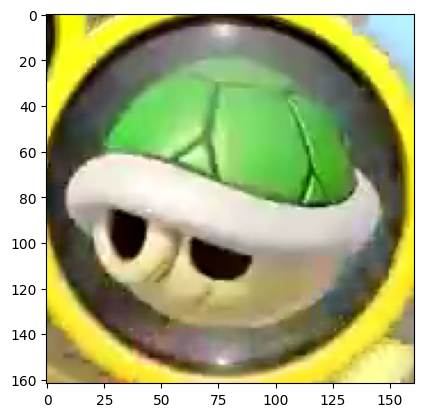

In [16]:
import matplotlib.pyplot as plt
import cv2

classes = ['01', '02', '03', '04', '05', '07', '09', '10', '11', '12', '13', '15', '16', '18', '19', '21', '23', '24']

# Example of running inference
image_path = '/Users/shingkai/code/personal-projects/mk8/race_videos/training/mirror_flower_cup/p1_first_item/0/020094.png'
# image_path = '/home/itsgrimetime/code/MarioKart8CV/race_videoss/training/item1/Player.P1/000922.png'

frame = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
predicted_label = predict_from_frame(frame)

print(f'The predicted label for the image is: {predicted_label}')

# SqueezeNet

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import cv2
import numpy as np

# Set up parameters
img_width, img_height = 112, 112  # SqueezeNet default input size
batch_size = 32
epochs = 5
data_dir = '/Users/shingkai/code/personal-projects/mk8/training_data/items'
device = torch.device("cuda:0" if torch.cuda.is_available() else torch.device("mps") if torch.backends.mps.is_available() else  torch.device("cpu"))

# Custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        self.images = self._load_images()

    def _load_images(self):
        images = []
        for cls_name in self.classes:
            cls_dir = os.path.join(self.data_dir, cls_name)
            for img_name in os.listdir(cls_dir):
                img_path = os.path.join(cls_dir, img_name)
                images.append((img_path, self.class_to_idx[cls_name]))
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path, label = self.images[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

# Data transforms
data_transforms = transforms.Compose([
    transforms.Resize((img_width, img_height)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the dataset
dataset = CustomDataset(data_dir, transform=data_transforms)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Load pre-trained SqueezeNet model
model = models.squeezenet1_1(pretrained=True)

# Modify the classifier
model.classifier[1] = nn.Conv2d(512, len(dataset.classes), kernel_size=(1,1), stride=(1,1))
model.num_classes = len(dataset.classes)

# Move model to device
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Training loop
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Validation Accuracy: {accuracy:.2f}%")

# Save the model
torch.save(model.state_dict(), 'squeezenet_pytorch.pth')

print("Training completed. Model saved as 'squeezenet_pytorch.pth'")


/Users/shingkai/code/personal-projects/mk8/MarioKart8CV/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/shingkai/code/personal-projects/mk8/MarioKart8CV/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/5, Loss: 0.5741


In [ ]:

# Set up parameters
img_width, img_height = 112, 112  # SqueezeNet default input size
device = torch.device("cuda:0" if torch.cuda.is_available() else torch.device("mps") if torch.backends.mps.is_available() else  torch.device("cpu"))

# Load the pre-trained SqueezeNet model architecture
model = models.squeezenet1_1(pretrained=False)

# Modify the classifier to match your number of classes
num_classes = 10  # Replace with the number of classes in your dataset
model.classifier[1] = torch.nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
model.num_classes = num_classes

# Load the saved state dict
model.load_state_dict(torch.load('squeezenet_pytorch.pth', map_location=device))
model = model.to(device)
model.eval()

# Define the transformation for input images
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((img_width, img_height)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Function to predict on a single image
def predict_image(image_path, model, transform):
    image = cv2.imread(image_path)
    predict_frame(image, model, transform)


# Function to predict on a cv2 frame
def predict_frame(frame, model=model, transform=transform):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = transform(image).unsqueeze(0).to(device)
    
    with torch.no_grad():
        output = model(image)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
        predicted_class = torch.argmax(probabilities).item()
        confidence = probabilities[predicted_class].item()
    
    return predicted_class, confidence

In [ ]:
import matplotlib.pyplot as plt
import cv2

classes = ['01', '02', '03', '04', '05', '07', '09', '10', '11', '12', '13', '15', '16', '18', '19', '21', '23', '24']

# Example of running inference
image_path = '/Users/shingkai/code/personal-projects/mk8/race_videos/training/mirror_flower_cup/p1_first_item/0/020094.png'
# image_path = '/home/itsgrimetime/code/MarioKart8CV/race_videoss/training/item1/Player.P1/000922.png'

frame = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
prediction, confidence = predict_frame(frame)
predicted_label = classes[prediction]

print(f'The predicted label for the image is: {predicted_label} ({confidence:.2f}%)')
